In [1]:
# ------------------------- Header ------------------------- 
import make_data as md
import numpy as np
import os
import re
from matplotlib import pyplot as plt
print('Files to be made:')
for i in range(20):
    for j in range(20):
        name = f'Data/Final_set/S{i}_C{j}'
        if os.path.isdir(name) and not os.path.isfile(name+'.npy'):
            print(f'S{i}_C{j}')
print('Files to be removed')
for i in range(20):
    for j in range(20):
        name = f'Data/Final_set/S{i}_C{j}'
        if not os.path.isdir(name) and os.path.isfile(name+'.npy'):
            print(f'S{i}_C{j}')

Files to be made:
Files to be removed


In [7]:
# -------------------------- Load data -----------------------------

boundary = list()
sim = 'S1_l7'
file = 'Data/Mesh_refinement/' + sim + '/'
l = 0.02
folders  = os.listdir(file + 'plt')
coor = md.load_shape(file + 'shape', [2,0], num=1500)
plt_folders = list()
for folder in folders:
    if folder[:3] != 'plt':        continue
    plt_folders.append( float(folder[3:])  )

newest = sorted(plt_folders,reverse=True)

for i in range(3):
    folder = folders[plt_folders.index(newest[i])]
    print(folder)
    ds = md.load_data(file + 'plt/' + folder)
    boundary.append( md.unfold(ds, coor, l ,l=5) )


yt : [INFO     ] 2023-09-04 07:39:08,261 Parameters: current_time              = 0.10440000000015615
yt : [INFO     ] 2023-09-04 07:39:08,261 Parameters: domain_dimensions         = [96 48  1]
yt : [INFO     ] 2023-09-04 07:39:08,262 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-09-04 07:39:08,263 Parameters: domain_right_edge         = [4. 2. 1.]


plt00042000


yt : [INFO     ] 2023-09-04 07:39:32,910 Parameters: current_time              = 0.10400000000014464
yt : [INFO     ] 2023-09-04 07:39:32,914 Parameters: domain_dimensions         = [96 48  1]
yt : [INFO     ] 2023-09-04 07:39:32,914 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-09-04 07:39:32,915 Parameters: domain_right_edge         = [4. 2. 1.]


plt00040000


yt : [INFO     ] 2023-09-04 07:39:58,681 Parameters: current_time              = 0.10360000000013314
yt : [INFO     ] 2023-09-04 07:39:58,682 Parameters: domain_dimensions         = [96 48  1]
yt : [INFO     ] 2023-09-04 07:39:58,682 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-09-04 07:39:58,683 Parameters: domain_right_edge         = [4. 2. 1.]


plt00038000


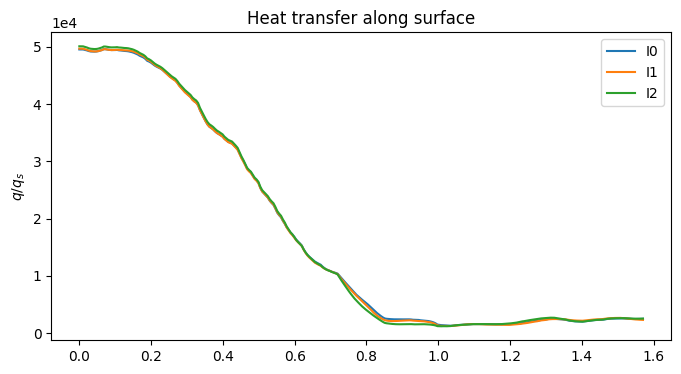

In [17]:
# ------------------------ Check data set -------------------
fig, ax = plt.subplots(figsize=(8,4))
y = 0.04# tangent
x = 0.1# normal / averaging
p = 1
r = 0.001# cut
def plot(boundary, ax, name):
    gradient = md.gradient_line(boundary, y,x,p, remove=r)
    ax.plot(gradient[:,0],gradient[:,1]  ,label=name)
    plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
    return gradient

gradients = list()
for i, bound in enumerate(boundary):
    gradients.append( plot(bound, ax, f'I{i}') )

ax.set_ylabel(r'$q/q_s$')
ax.legend()
ax.set_title('Heat transfer along surface');

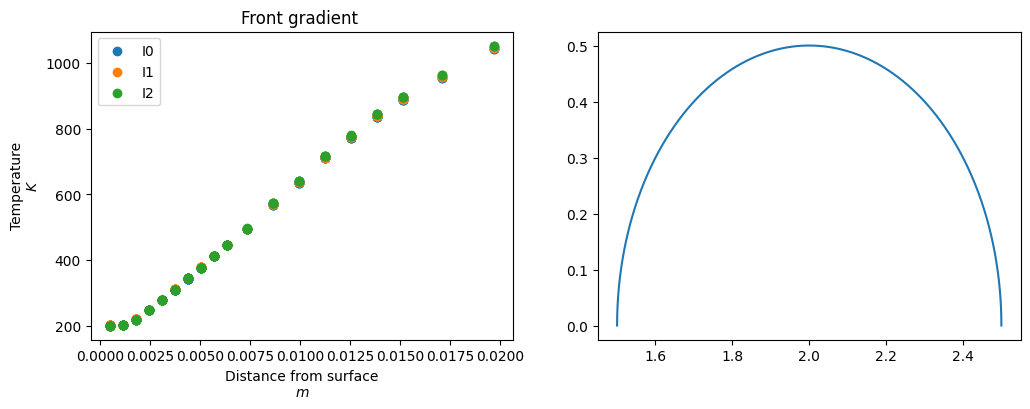

In [8]:
# ------------------------ Individual points plot -------------------
fig, ax = plt.subplots(1,2,figsize=(12,4))
ax[0].set_title('Front gradient ')
ax[0].set_ylabel('Temperature\n$K$')
ax[0].set_xlabel('Distance from surface\n$m$')
x  = 0.01
y  = 0.05
r  = 0.00

def plot_points(boundary, ax, name):
    points = boundary[boundary[:,1]<x/2]
    points = points[points[:,0]<y]
    points = points[points[:,0]>r]
    ax.scatter(points[:,0], points[:,4], label=name)

ax[1].plot(coor[:,0], coor[:,1])
for i, bound in enumerate(boundary[-5:]):
    plot_points(bound, ax[0], f'I{i}')
ax[0].legend()

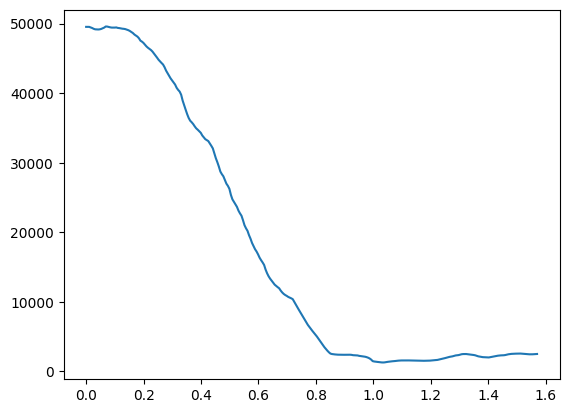

In [18]:
# ----- save the output ------
final =gradients[0]

plt.plot(final[:,0], final[:,1])

np.save('Data/Mesh_refinement/'+sim, final)

In [4]:
# check through cases
p_list = list()
counter = 0
for j in range(20):
    points = list()
    for i in range(20):
        filename = f'Data/Final_set/S{i}_C{j}/input_file'
        if not os.path.isfile(filename): continue
        with open(filename, 'r') as file:
            content = file.read()[:20]
        ma = float(content.split()[0])
        re = float(content.split()[1])
        points.append([i, ma, re])
        counter += 1
    filename = f'Cases_files/C{j}/input_file'
    if not os.path.isfile(filename): continue
    with open(filename, 'r') as file:
        content = file.read()[:20]
    ma = float(content.split()[0])
    re = float(content.split()[1])
    p_list.append([ma,re])
    print(j, ma, re, points)
print(counter)
#np.save('casepoints.npy',np.array(p_list))

0 5.3 10394.0 [[8, 5.3, 10394.0]]
1 10.3 11457.0 [[1, 10.3, 11457.0]]
2 2.7 8001.0 [[0, 2.7, 8001.0], [4, 2.7, 8001.0]]
3 12.2 19063.0 [[6, 12.2, 19063.0]]
4 10.5 12096.0 [[5, 10.5, 12096.0], [8, 10.5, 12096.0], [15, 10.5, 12096.0], [16, 10.5, 12096.0]]
5 3.6 9846.0 [[0, 3.6, 9846.0], [1, 3.6, 9846.0], [15, 3.6, 9846.0], [17, 3.6, 9846.0]]
6 5.5 16465.0 [[12, 5.5, 16465.0]]
7 11.8 13115.0 []
8 10.1 14174.0 [[3, 10.1, 14174.0]]
9 6.6 13595.0 [[11, 6.6, 13595.0]]
10 4.1 15070.0 [[4, 4.1, 15070.0], [19, 4.1, 15070.0]]
11 9.4 14906.0 []
12 6.2 14680.0 [[14, 6.2, 14680.0]]
13 10.1 19046.0 []
14 6.3 15372.0 [[7, 6.3, 15372.0]]
15 4.6 13708.0 []
16 7.5 16662.0 []
17 9.8 16971.0 [[17, 9.8, 16971.0]]
18 3.5 12053.0 [[5, 3.5, 12053.0]]
19 7.1 17819.0 [[5, 7.1, 17819.0], [7, 7.1, 17819.0], [11, 7.1, 17819.0], [14, 7.1, 17819.0]]
26


In [5]:
mat = np.zeros((20,20))
for j in range(20):
    points = list()
    for i in range(20):
        filename = f'Data/Final_set/S{i}_C{j}/input_file'
        if not os.path.isfile(filename): continue
        mat[i,j] = 1
#print(mat)
# ---------------------------- Latin square randomisation -------------------------------
for i in range(20):
    if mat[i].sum() > 0: continue
    for j in range(20):
        if mat[:,j].sum() > 0: continue
        print(j,i)
        mat[i,j] = 1
        break

for i in range(20):
    if mat[i].sum() > 1: continue
    for j in range(20):
        if mat[:,j].sum() > 1: continue
        if mat[i,j] > 0: continue
        print(j,i)
        mat[i,j] = 1
        break

#print(mat)

7 2
11 9
13 10
15 13
16 18
0 2
1 3
6 6
3 9
7 10
8 12
9 13
11 16
12 18
13 19


In [15]:
for j in range(27):
    filename = f'Cases_files/C{j}/input_file'
    if not os.path.isfile(filename): continue
    with open(filename, 'r') as file:
        content = file.read()[:20]
    ma = float(content.split()[0])
    re = float(content.split()[1])
    print(j, ma, re)
points

0 4.6 9861.0
1 10.3 11457.0
2 2.7 8001.0
3 7.4 11967.0
4 10.5 12096.0
5 3.6 9846.0
6 5.1 12031.0
7 11.8 13115.0
8 10.1 14174.0
9 6.6 13595.0
10 2.9 10047.0
11 9.4 14906.0
12 6.2 14680.0
13 13.4 14384.0
14 6.3 15372.0
15 4.6 13708.0
16 7.5 16662.0
17 9.8 16971.0
18 3.5 12053.0
19 7.1 17819.0
20 3.2 12762.0
21 5.5 16465.0
22 13.5 18996.0
23 10.1 19046.0
24 4.4 16146.0
25 7.2 19214.0
26 17.0 15691.0


[]